# NLP Homework 2

## Домашнее задание номер 2

На последнем семинаре мы проанализировали несколько различных морфологических теггеров. Как же узнать, какой использовать? Давайте сравним их качество!

В этой домашке вам будет нужно найти тексты на русском языке (размер корпуса не менее 200 слов), 
в которых  будут какие-то трудные или неоднозначные для POS теггинга моменты и разметить их вручную 
– с помощью этих текстов мы будем оценивать качество работы наших теггеров. В текстах размечаем только части речи, ничего больше!
1. (1 балл) Создание, разметка корпуса и объяснение того, почему этот текст подходит для оценки (какие моменты вы тут считаете трудными для автоматического посттеггинга и почему, в этом вам может помочь второй ридинг). Не забывайте, что разные теггеры могут использовать разные тегсеты: напишите комментарий о том, какой тегсет вы берёте для разметки и почему.

In [1]:
# garden path sentences gathered from a google search
with open('corpus.txt', 'r') as f:
    corp = f.read()
    
len(corp.split())

218

In [2]:
from nltk.tokenize import word_tokenize

# i will then manually attach POS tags to every token
corp_underscored = ' '.join([token+'_' for token in word_tokenize(corp)])

with open('corpus_annotated.txt', 'w') as f:
    f.write(corp_underscored)

In [3]:
with open('corpus_annotated.txt', 'r') as f:
    corp_annotated = f.read()

tag_true = [token.split('_')[1] for token in corp_annotated.split(' ')]

In [4]:
tag_true

['DET',
 'NOUN',
 'VERB',
 'ADP',
 'DET',
 'NOUN',
 'VERB',
 'PUNCT',
 'DET',
 'ADJ',
 'VERB',
 'DET',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'DET',
 'NOUN',
 'VERB',
 'ADJ',
 'PUNCT',
 'DET',
 'ADJ',
 'NOUN',
 'AUX',
 'VERB',
 'ADP',
 'VERB',
 'ADP',
 'PROPN',
 'PUNCT',
 'DET',
 'ADJ',
 'VERB',
 'ADP',
 'DET',
 'NOUN',
 'PUNCT',
 'AUX',
 'DET',
 'NOUN',
 'PRON',
 'VERB',
 'DET',
 'NOUN',
 'VERB',
 'DET',
 'NOUN',
 'PUNCT',
 'PRON',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'PRON',
 'VERB',
 'VERB',
 'ADP',
 'ADP',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'ADP',
 'DET',
 'NOUN',
 'VERB',
 'PUNCT',
 'PRON',
 'PROPN',
 'VERB',
 'NOUN',
 'VERB',
 'VERB',
 'PUNCT',
 'PROPN',
 'VERB',
 'DET',
 'NOUN',
 'DET',
 'NOUN',
 'VERB',
 'DET',
 'PROPN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'DET',
 'NOUN',
 'VERB',
 'PUNCT',
 'PRON',
 'VERB',
 'PRON',
 'NOUN',
 'AUX',
 'ADJ',
 'PUNCT',
 'PROPN',
 'AUX',
 'VERB',
 'NOUN',
 'ADP',
 'AUX',
 'DET',
 'ADJ',
 'NOUN'

2. (3 балла) Потом вам будет нужно взять три  POS теггера для русского языка (udpipe, stanza, natasha, pymorphy, mystem, spacy, deeppavlov) и «прогнать» текст через каждый из них.

In [6]:
# import sys
# sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')

import spacy
import nltk
import stanza

3. (2 балла) Затем оценим accuracy для каждого теггера. Заметьте, что в разных системах имена тегов и части речи  могут отличаться, – вам надо будет свести это всё к единому стандарту с помощью какой-то функции-конвертера и сравнить с вашим размеченным руками эталоном - тоже с помощью какого-то кода или функции.

In [7]:
nltk2stanza = {'$': 'SYM',
 '#': 'SYM',
 "''": 'PUNCT',
 '(': 'PUNCT',
 ')': 'PUNCT',
 ',': 'PUNCT',
 '--': 'PUNCT',
 '.': 'PUNCT',
 ':': 'PUNCT',
 'CC': 'CONJ',
 'CD': 'NUM',
 'DT': 'DET',
 'EX': 'PRON',
 'FW': 'X',
 'IN': 'ADP',
 'JJ': 'ADJ',
 'JJR': 'ADJ',
 'JJS': 'ADJ',
 'LS': 'SYM',
 'MD': 'AUX',
 'NN': 'NOUN',
 'NNP': 'PROPN',
 'NNPS': 'PROPN',
 'NNS': 'NOUN',
 'PDT': 'DET',
 'POS': 'X',
 'PRP': 'PRON',
 'PRP$': 'PRON',
 'RB': 'ADV',
 'RBR': 'ADV',
 'RBS': 'ADV',
 'RP': 'ADV',
 'SYM': 'SYM',
 'TO': 'ADP',
 'UH': 'INTJ',
 'VB': 'VERB',
 'VBD': 'VERB',
 'VBG': 'VERB',
 'VBN': 'VERB',
 'VBP': 'VERB',
 'VBZ': 'VERB',
 'WDT': 'PRON',
 'WP': 'PRON',
 'WP$': 'PRON',
 'WRB': 'PRON',
 '``': 'PUNCT'}

In [8]:
def tag_seq(seq, model_type, model=None):
    
    if model_type == 'spacy':
        if not model:
            model = spacy.load("en_core_web_sm")
        return [(token.text, token.pos_) for token in model(seq)]
    elif model_type == 'nltk':
        text = word_tokenize(seq)
        nltk_tagged_seq = nltk.pos_tag(text)
        return [(token[0], nltk2stanza[token[1]]) for token in nltk_tagged_seq]
    elif model_type == 'stanza':
        if not model:
            model = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')
        doc = model(seq)
        return [(token.text, token.upos) for sent in doc.sentences for token in sent.words]

class MorphTagger():
    
    """
    a class for morhological tagging of English text
    args:
        model -- callable which tags a sequence (spacy/nltk/stanza)
        model_type -- string in ['spacy', 'nltk', 'stanza']
    """
    
    def __init__(self, 
                 model_type,
                 model=None):
        
        self.model = model
        self.model_type = model_type
        
    def load_model(self):
        
        if not self.model:
            if self.model_type == 'spacy':
                self.model = spacy.load("en_core_web_sm")
            elif self.model_type == 'stanza':
                self.model = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')
        
    def tag_seq(self, seq):
        
        return tag_seq(seq, self.model_type, self.model)
    
    def predict(self, seq):
        
        return [token[1] for token in tag_seq(seq, self.model_type, self.model)]

In [9]:
tagger = MorphTagger('spacy')
tagger.load_model()
tagger.predict('i love trains so much literally i can\'t')

['PRON', 'VERB', 'NOUN', 'ADV', 'ADV', 'ADV', 'PRON', 'AUX', 'PART']

In [10]:
spacy_tagger = MorphTagger('spacy')
spacy_tagger.load_model()

nltk_tagger = MorphTagger('nltk')

stanza_tagger = MorphTagger('stanza')
stanza_tagger.load_model()

2022-10-11 21:47:12 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-10-11 21:47:13 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-10-11 21:47:13 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-10-11 21:47:13 INFO: Use device: cpu
2022-10-11 21:47:13 INFO: Loading: tokenize
2022-10-11 21:47:13 INFO: Loading: pos
2022-10-11 21:47:13 INFO: Done loading processors!


In [11]:
with open('corpus_annotated.txt', 'r') as f:
    corpus = f.read()
    corpus_list = [token.split('_')[0] for token in corp_annotated.split(' ')]
    corpus_clean = ' '.join(corpus_list)

# spacy and stanza do their own tokenization, which is not to our benefit
tag_pred_spacy = [spacy_tagger.predict(token)[0] for token in corpus_list]
tag_pred_nltk = nltk_tagger.predict(corpus_clean)
tag_pred_stanza = [stanza_tagger.predict(token)[0] for token in corpus_list]

In [12]:
# убедимся что везде одинаково по длине
print(len(tag_pred_spacy), len(tag_pred_nltk), len(tag_pred_stanza))

247 247 247


In [13]:
import pandas as pd

preds = pd.DataFrame({
    'token': corpus_list,
    'true': tag_true,
    'spacy': tag_pred_spacy,
    'nltk': tag_pred_nltk,
    'stanza': tag_pred_stanza
})

preds.loc[preds['true'] != preds['nltk']].head(10)
# интересно посмотреть, где они ошибаются. зачастую недопонимают garden path предложения так, как и задумано
# (например, man -- NOUN в предложении the old man the boat)

,token,true,spacy,nltk,stanza
10,man,VERB,NOUN,NOUN,NOUN
23,cotton,ADJ,NOUN,NOUN,NOUN
25,is,AUX,AUX,VERB,VERB
28,grows,VERB,VERB,NOUN,VERB
34,drink,VERB,VERB,NOUN,VERB
39,Have,AUX,VERB,VERB,VERB
48,supplementary,NOUN,ADJ,ADJ,ADJ
62,out,ADP,ADP,ADV,ADV
72,sank,VERB,VERB,NOUN,VERB
87,bit,VERB,NOUN,NOUN,NOUN


In [14]:
from sklearn.metrics import accuracy_score

print('spacy accuracy: ', accuracy_score(tag_true, tag_pred_spacy))
print('nltk accuracy: ', accuracy_score(tag_true, tag_pred_nltk))
print('stanza accuracy: ', accuracy_score(tag_true, tag_pred_stanza))

# победил nltk

spacy accuracy:  0.631578947368421
nltk accuracy:  0.8582995951417004
stanza accuracy:  0.7854251012145749


4. (2 балла) Дальше вам нужно взять лучший теггер для русского языка и с его помощью написать функцию (chunker), которая выделяет из размеченного текста 3 типа n-грамм, соответствующих какому-то шаблону (к примеру не + какая-то часть речи или NP или сущ.+ наречие и тд) 

In [15]:
def get_chunks(seq, pattern):
    
    """
    chunker function
    args:
        seq -- sequence to search for chunks
        pattern -- list of POS tags to find
    """
    
    text = word_tokenize(seq)
    nltk_tagged_seq = nltk.pos_tag(text)
    tagged_seq = [(token[0], nltk2stanza[token[1]]) for token in nltk_tagged_seq]
    
    chunks = []
    for i in range(len(tagged_seq)-len(pattern)+1):
        n_gram = tagged_seq[i:i+len(pattern)]
        if all([n_gram[i][1] == pattern[i] for i in range(len(pattern))]):
            chunks.append(n_gram)
            
    return chunks

In [16]:
get_chunks('i love trains, i love trains so much i am going to drive a train one day', ['NOUN', 'VERB'])

[[('i', 'NOUN'), ('love', 'VERB')], [('i', 'NOUN'), ('am', 'VERB')]]

5. (2-3 балла) В предыдущем дз многие из вас справедливо заметили, что если бы мы могли класть в словарь не только отдельные слова, но и словосочетания, то программа работала бы лучше. Предложите 3 шаблона (слово + POS-тег / POS-тег + POS-тег) запись которых в словарь, по вашему мнению, улучшила бы качество работы программы из предыдущей домашки. Балл за объяснение того, почему именно эти группы вы взяли, балл за встраивание функции в программу из предыдущей домашки, балл за сравнение качества предсказания тональности с улучшением и без (это бонусный одиннадцатый балл).

In [17]:
reviews = pd.read_json('weezer_reviews.json')

In [18]:
pd.set_option('display.max_colwidth', None)
reviews.loc[reviews['target'] == 1].sample(5)

# можно поисследовать отзывы, запуская эту ячейку

,text,grade,album,target
68,"Weezer has had so many duds over the last 20 years, even their good entries (The White Album, Everything Will be Alright in the End) end with middle of the pack ratings. Well, what if Weezer made a great album, again? Would anyone admit it? This is Weezer's first great album in 20+ years but I'm betting reviewers will play it safe and this will settle into the ""pretty good"" zone. But makeWeezer has had so many duds over the last 20 years, even their good entries (The White Album, Everything Will be Alright in the End) end with middle of the pack ratings. Well, what if Weezer made a great album, again? Would anyone admit it? This is Weezer's first great album in 20+ years but I'm betting reviewers will play it safe and this will settle into the ""pretty good"" zone. But make no mistake, it's reputation will grow. Substantively, it's a love letter to late Beatles music, something that sounds somewhat fresh again after rock has wandered in a different (mostly awful) direction over the last decade. Rock music hasn't used strings so effectively since peak Arcade Fire. Anyway, really welcome.… Expand",9.0,ok-human,1
428,One of the Best Albums of the 90's and one of the most influential records of this generation...So many bands today have drawn from this epic album. Its so raw and emotional yet enjoyable to listen to. It truly tugs at the emotions of our inner selves.,10.0,pinkerton-deluxe-edition,1
437,"Always been underrated,weezer's second lp is their best and make me cry thinking of their last three to five records.Pinkerton,it's a classic,make me think of the time when it was released for the first time,sweet sweet memories!",8.0,pinkerton-deluxe-edition,1
675,"most critics don't give the album more than a couple listens, and this record needs quite a few before its beauty is revealed. give it a fe more spins and you'll notice that ""This is Such a Pity"", ""The Damage In Your Heart"", ""The Other Way"", ""Freak Me Out"", and ""Haunt You Everyday"" are great additions to the Cuomo songbook.",7.0,make-believe,1
347,By far their best effort since the 1990's. it's so great to have Weezer back in full form! Congratulations Rivers and the rest of the band on such an amazing album,9.0,everything-will-be-alright-in-the-end,1


Сейчас найдем паттерны, посчитаем их частотность в каждом отзыве и будем добавлять к выходу функции predict() с весом, который подберем потом (потому что кто его знает, что окажется важнее -- слова в словаре или параметры)

Искать будем следующее:

- конструкции типа it's ADJ/DET NOUN -- могут встречаться в особенно эмоциональных отзывах
- сочетание ADV+ADJ -- опять же, сигнализирует о наличии в отзыве оценочных слов, может помочь классификатору
- сочетание DET+NOUN+VERB -- хотелось бы искать this/the album is

In [19]:
from tqdm import tqdm

tqdm.pandas()
reviews['adv+adj'] = reviews['text'].progress_apply(lambda x: len(get_chunks(x, ['ADV', 'ADJ'])))
reviews['pron+verb'] = reviews['text'].progress_apply(lambda x: len(get_chunks(x, ['PRON', 'VERB'])))
reviews['det+noun+verb'] = reviews['text'].progress_apply(lambda x: len(get_chunks(x, ['DET', 'NOUN', 'VERB'])))

100%|██████████| 851/851 [00:04<00:00, 180.64it/s]


In [20]:
import json

# taken from HW1; optimized good/bad words dicts
with open('dicts.json', 'r') as f:
    dicts = json.load(f)
    
words_good_only = dicts['good']
words_bad_only = dicts['bad']

In [21]:
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import string
  
lemmatizer = WordNetLemmatizer()

def preprocess_text(s, return_list=True):
    # lower and tokenize
    tokens = wordpunct_tokenize(s.lower())
    # lemmatize
    lemmas = []
    for token in tokens:
        # skip numbers and punctuation
        if not (all([char in string.punctuation+'!….' for char in token]) or all([char.isdigit() for char in token])):
            lemmas.append(lemmatizer.lemmatize(token))
        
    if return_list:   
        return lemmas
    else:
        return ' '.join(lemmas)

def get_sums(text, preprocess=True):
    
    if preprocess:
        prep_text = preprocess_text(text)
        
    good_sum = sum([word in words_good_only for word in prep_text])
    bad_sum = sum([word in words_bad_only for word in prep_text])
    sum_dic = {1: good_sum, 0: bad_sum}
    
    return sum_dic

In [22]:
reviews['good_sum'] = reviews['text'].progress_apply(lambda x: get_sums(x)[1])
reviews['bad_sum'] = reviews['text'].progress_apply(lambda x: get_sums(x)[0])

100%|██████████| 851/851 [00:01<00:00, 647.25it/s]


### попробуем сначала без паттернов

In [23]:
from sklearn.model_selection import train_test_split

# 80% train, 10% validation, 10% test
X_train, X_test, y_train, y_test = train_test_split(
    reviews[['good_sum', 'bad_sum']], 
    reviews[['target']], test_size=0.2, random_state=42)

print(len(X_train), 'training reviews')
print(len(X_test), 'testing reviews')

680 training reviews
171 testing reviews


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('train f1:', f1_score(y_train, y_train_pred))
print('test f1:', f1_score(y_test, y_test_pred))

train f1: 0.9413793103448277
test f1: 0.9072847682119205


/Users/shikunova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### теперь с паттернами

In [25]:
from sklearn.model_selection import train_test_split

# 80% train, 10% validation, 10% test
X_train, X_test, y_train, y_test = train_test_split(
    reviews[['good_sum', 'bad_sum', 'adv+adj', 'pron+verb', 'det+noun+verb']], 
    reviews[['target']], test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('train f1:', f1_score(y_train, y_train_pred))
print('test f1:', f1_score(y_test, y_test_pred))

train f1: 0.9420916162489196
test f1: 0.9133333333333333


/Users/shikunova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Итого получается только самую малось получше. Еще можем посмотреть на веса, которые линейная модель присваивает нашим паттернам -- чем выше по модулю вес, тем важнее признак.

In [26]:
dict(zip(X_train.columns, list(logreg.coef_[0])))

{'good_sum': 0.48854698157778187,
 'bad_sum': -1.3436067360744364,
 'adv+adj': 0.06368291569361036,
 'pron+verb': -0.14386032249299202,
 'det+noun+verb': -0.16250793819456286}

<AxesSubplot:title={'center':'logreg weights'}>

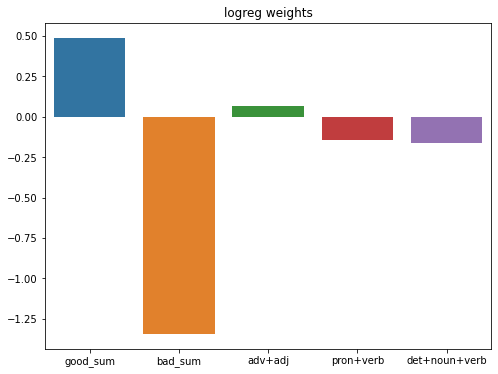

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('logreg weights')
sns.barplot(x=X_train.columns, y=logreg.coef_[0])

# паттерны для модели не очень важны, но видимо pron+verb и det+noun+verb встречаются скорее в негативных отзывах